# viz

> Fill in a module description here

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp viz

In [ ]:
#| export
from fastdot import *
from IPython.display import SVG, display
from neev.engine import *

Install `fastdot` using `mamba install -c fastai fastdot`

In [ ]:
#| hide
!pwd

/Users/kaushik.sinha/ws_p/neev/nbs


In [ ]:
#| export
def trace(root:Value):# root node of the computation graph
    '''builds a set of all nodes and edges in a graph'''
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

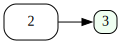

In [ ]:
#|hide
g = Dot(rankdir='LR',directed=True)

n1 = Node('2', name='blah', fillcolor=None)
n2 = Node('3', name='foo', height=0.25, width=0.25)
g.add_items(n1, n2, n1.connect(n2))
# g.add_item()
g

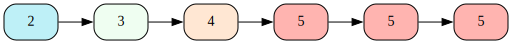

In [ ]:
#|hide
g = Dot(rankdir='LR',directed=True)

n1 = g.add_item('2', name='blah')
n2 = g.add_item('3', name='*foo')
n3 = g.add_item('4', name='b1ar')
n4 = g.add_item('5', name='b+ar')
n5 = g.add_item('5', name='0_ar')
n6 = g.add_item('5', name='_ar')
g.add_items(n1.connect(n2), n2.connect(n3),n3.connect(n4),n4.connect(n5),n5.connect(n6))
g

In [ ]:
#|hide
# Note the following results in an empty list :(
# i.e., we are not able to retrieve the node even though
# it exists.
assert g.get_node('*foo') == []
assert g.get_node('b+ar') == []
assert g.get_node('0_ar') == []

In [ ]:
#|hide
# We can only get a node whose name starts with letters
g.get_node('blah')

[<pydot.Node>]

In [ ]:
#|hide
g.get_node('b1ar'), g.get_node('_ar')

([<pydot.Node>], [<pydot.Node>])

In [ ]:
#|hide
g.get_node_list()

[<pydot.Node>,
 <pydot.Node>,
 <pydot.Node>,
 <pydot.Node>,
 <pydot.Node>,
 <pydot.Node>]

In [ ]:
#|hide
for node in g.get_node_list():
    print(node.get_name())

blah
"*foo"
b1ar
"b+ar"
"0_ar"
_ar


In [ ]:
#|export
def get_dot(root:Value,# root node of the computation graph
            rankdir='LR'):# TB (top to bottom graph) | LR (left to right)
    """
    get a pydot graph corresponding to this computation graph
    """
    assert rankdir in ['LR', 'TB']
    
    op_dict = {'+' : 'PL', '-': 'MN', 
               '*' : 'MU', '/': 'DI'}
    
    nodes, edges = trace(root)
    dot = Dot(rankdir=rankdir,directed=True)
    
    for n in nodes:
        # for any value in the graph, create a rectangular (`record`) node for it
        nd_label = f'{n.label} \n data {n.data:.4f} \n grad {n.grad:.4f}'
        nd_name = str(id(n))
        nd = dot.add_item(nd_label, name=nd_name, fillcolor=None)
#         print(f'node:{nd_label};name:{nd_name}')
        if n._op:
            # if this value is the result of some operation create an op node for it
            nd_op_name = op_dict[n._op] + str(id(n))  
            nd_op = dot.add_item(n._op, 
                                 name=nd_op_name, fillcolor=None, 
                                 height=0.25, width=0.25)
#             print(f'node:{n._op};name:{nd_op_name}')
            # and connect this node to it
            dot.add_item(nd_op.connect(nd))
            
    for n1, n2 in edges:
        n1_nd_name = str(id(n1))
        n1_nd = dot.get_node(n1_nd_name)[0]
        n2_op_nd_name = op_dict[n2._op] + str(id(n2))
        n2_op_nd = dot.get_node(n2_op_nd_name)[0]
#         print(f'Fetch: {n2_op_nd_name} is {n2_op_nd}')
        # connect n1 to the op node of n2
        dot.add_item(n1_nd.connect(n2_op_nd))
    
    return dot

In [ ]:
#|export
# https://stackoverflow.com/questions/4596962/display-graph-without-saving-using-pydot
# https://stackoverflow.com/questions/30334385/display-svg-in-ipython-notebook-from-a-function
def view_dot(g:pydot.Dot):# a pydot representation of a computation graph
    '''view the computation graph as a svg'''
    svg = SVG(g.create_svg())
    display(svg)

In [ ]:
a,b,c = Value(2.,label='a'),Value(-3.,label='b'),Value(10.,label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.); f.label='f'
L = d*f; L.label = 'L'
L

Value(data=-8.0)

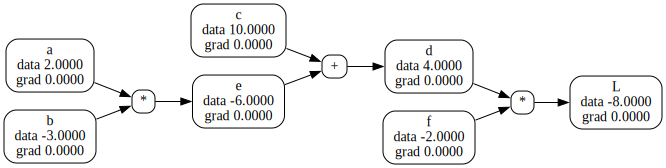

In [ ]:
view_dot(get_dot(L))

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()